# Python AWIPS Data Access Framework

The [`python-awips`](http://www.github.com/Unidata/python-awips) package provides a Data Acccess Framework (DAF) for requesting data from a remote AWIPS II EDEX server.  

The [AWIPS II Python Stack](http://) installed via RPM contains the DAF, matplotlib, numpy, scipy, basemap, pint, shapely, and other packages. 

## Listing a Grid Inventory

In [1]:
from awips.dataaccess import DataAccessLayer

# Set host
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")

# Init data request
request = DataAccessLayer.newDataRequest()

# Set datatype
request.setDatatype("grid")

# Get a list of all available models
available_grids = DataAccessLayer.getAvailableLocationNames(request)

# Sort
available_grids.sort()

# Print
for grid in available_grids:
    print grid

AVN211
AVN225
DGEX
ECMF-Global
ECMF1
ECMF10
ECMF11
ECMF12
ECMF2
ECMF3
ECMF4
ECMF5
ECMF6
ECMF7
ECMF8
ECMF9
ETA
GFS
GFS40
GFSGuide
GFSLAMP5
HPCGuide
HPCqpfNDFD
HRRR
LAMP2p5
MRMS_1000
NAM12
NAM40
NCWF
NOHRSC-SNOW
NamDNG
NamDNG5
QPE-MSR
RAP13
RAP40
RTMA
RTMA5
URMA25
estofsPR
estofsUS


**LocationNames** is different for different plugins
- radar is icao
- satellite is sector


## Requesting a Grid

In [2]:
# Grid request
request.setLocationNames('RAP40')
request.setParameters("RH")
request.setLevels("850MB")

# Get available times
t = DataAccessLayer.getAvailableTimes(request)

# Select last available time [-1]
response = DataAccessLayer.getGridData(request, [t[0]])
data = response[0]
lon,lat = data.getLatLonCoords()

# Print info
print 'Time :', t[-1]
print 'Model:', data.getLocationName()
print 'Unit :', data.getUnit()
print 'Parm :', data.getParameter()

# Print data array
print data.getRawData().shape
print data.getRawData()
print "lat array =", lat
print "lon array =", lon


Time : 2016-02-23 15:00:00 (12)
Model: RAP40
Unit : %
Parm : RH
(151, 113)
[[ 93.05456543  93.05456543  87.05456543 ...,  73.05456543  72.05456543
   71.05456543]
 [ 70.05456543  70.05456543  67.05456543 ...,  69.05456543  46.05456924
   37.05456924]
 [ 40.05456924  56.05456924  68.05456543 ...,  51.05456924  73.05456543
   74.05456543]
 ..., 
 [ 65.05456543  62.05456924  63.05456924 ...,  67.05456543  65.05456543
   46.05456924]
 [ 48.05456924  59.05456924  62.05456924 ...,   4.05456877   5.05456877
    5.05456877]
 [  7.05456877   8.05456829  10.05456829 ...,  91.05456543  95.05456543
   95.05456543]]
lat array = [[ 54.24940109  54.35071945  54.45080566 ...,  57.9545517   57.91926193
   57.88272858]
 [ 57.84495163  57.80593109  57.76566696 ...,  58.07667542  58.08861542
   58.09931183]
 [ 58.10876846  58.11697769  58.12394714 ...,  56.40270996  56.46187973
   56.51980972]
 ..., 
 [ 19.93209648  19.89832115  19.86351395 ...,  20.054636    20.06362152
   20.07156372]
 [ 20.0784626   20

## Plotting a Grid using Basemap

Using **matplotlib**, **numpy**, and **basemap**:

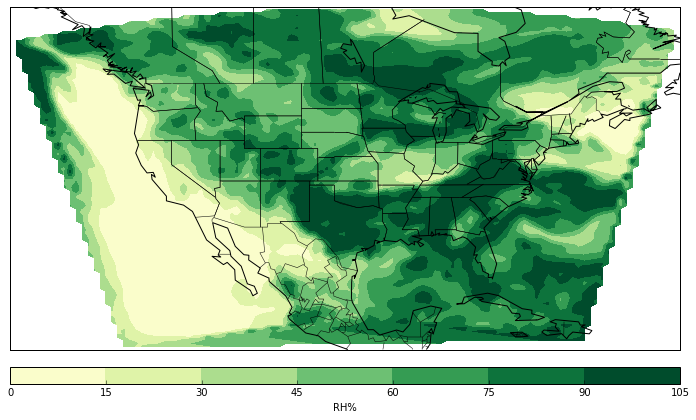

In [3]:
%matplotlib inline
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from numpy import linspace, transpose
from numpy import meshgrid

plt.figure(figsize=(12, 12), dpi=100)
lons,lats = data.getLatLonCoords()

map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()

# 
# We have to reproject our grid, see https://stackoverflow.com/questions/31822553/m
#
x = linspace(0, map.urcrnrx, data.getRawData().shape[1])
y = linspace(0, map.urcrnry, data.getRawData().shape[0])
xx, yy = meshgrid(x, y)
ngrid = len(x)
rlons = np.repeat(np.linspace(np.min(lons), np.max(lons), ngrid),
          ngrid).reshape(ngrid, ngrid)
rlats = np.repeat(np.linspace(np.min(lats), np.max(lats), ngrid),
          ngrid).reshape(ngrid, ngrid).T
tli = mtri.LinearTriInterpolator(mtri.Triangulation(lons.flatten(),
          lats.flatten()), data.getRawData().flatten())
rdata = tli(rlons, rlats)
cs = map.contourf(rlons, rlats, rdata, latlon=True, vmin=0, vmax=100, cmap='YlGn')

# add colorbar.
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label(data.getParameter() + data.getUnit() )

# Show plot
plt.show()


or use `pcolormesh` instead of `contourf`

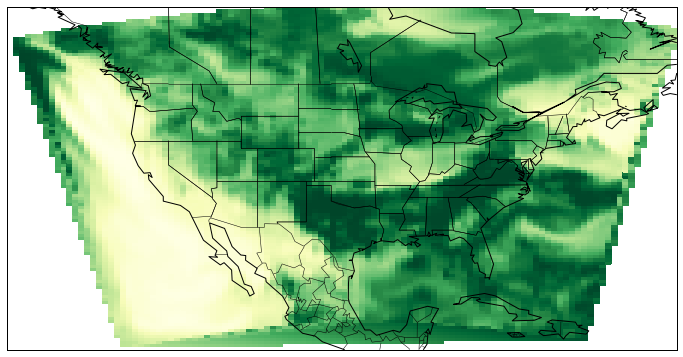

In [4]:
plt.figure(figsize=(12, 12), dpi=100)
map = Basemap(projection='cyl',
      resolution = 'c',
      llcrnrlon = lons.min(), llcrnrlat = lats.min(),
      urcrnrlon =lons.max(), urcrnrlat = lats.max()
)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
cs = map.pcolormesh(rlons, rlats, rdata, latlon=True, vmin=0, vmax=100, cmap='YlGn')

## Plotting a Grid using Cartopy


/awips2/python/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


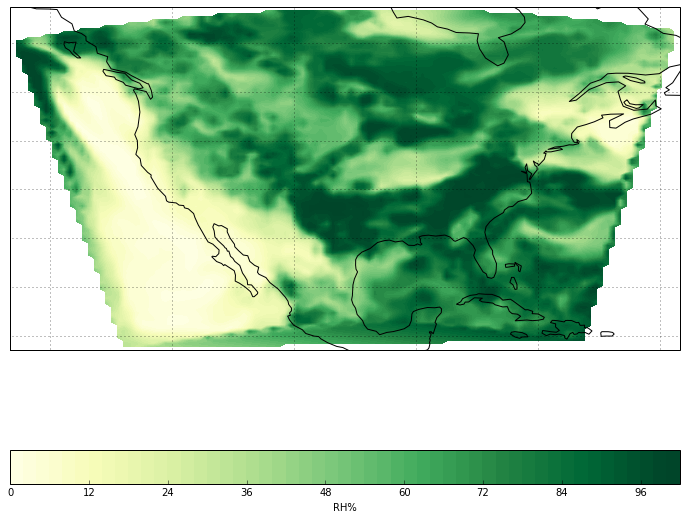

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import iris
import cartopy.crs as ccrs
from cartopy import config

lon,lat = data.getLatLonCoords()
plt.figure(figsize=(12, 12), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
cs = plt.contourf(rlons, rlats, rdata, 60, transform=ccrs.PlateCarree(), vmin=0, vmax=100, cmap='YlGn')
ax.coastlines()
ax.gridlines()

# add colorbar
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(data.getParameter() + data.getUnit() )
plt.show()

# Plotting a Sounding with MetPy

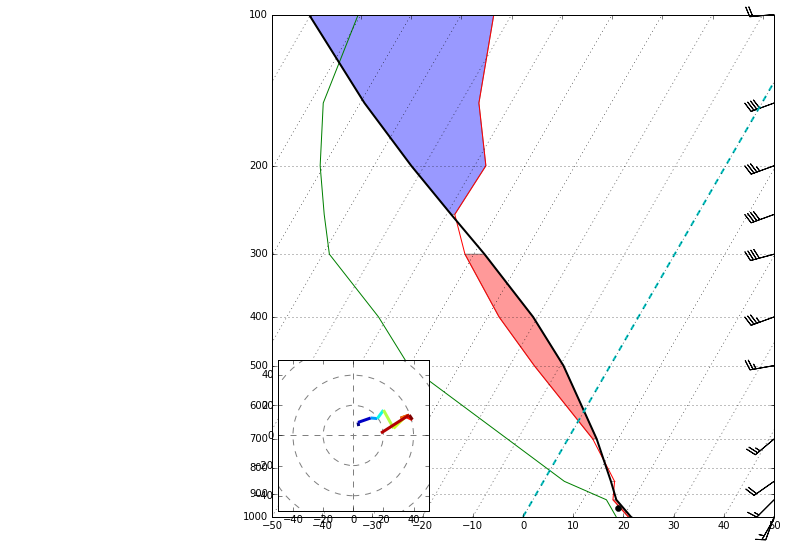

In [123]:
from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile
from metpy.calc import tools
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import numpy as np

# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)
#fig = plt.figure(figsize=(9, 9))

# Request BUFR UAIR
request.setDatatype("bufrua")
request.setParameters("tpMan","tdMan","prMan","htMan","wdMan","wsMan")
request.setLocationNames("72240")
datatimes = DataAccessLayer.getAvailableTimes(request)
response = DataAccessLayer.getGeometryData(request,times=datatimes[-1].validPeriod)

# Initialize data arrays
tpMan,tdMan,prMan,htMan,wdMan,wsMan = [],[],[],[],[],[]

# Build ordered arrays
for ob in response:
    tpMan.append(float(ob.getString("tpMan")))
    tdMan.append(float(ob.getString("tdMan")))
    prMan.append(float(ob.getString("prMan")))
    htMan.append(float(ob.getString("htMan")))
    wdMan.append(float(ob.getString("wdMan")))
    wsMan.append(float(ob.getString("wsMan")))

# Convert temps to C
T = np.array(tpMan)-273.15
Td = np.array(tdMan)-273.15
p = np.array(prMan)/100
height = np.array(htMan)
direc = np.array(wdMan)
spd = np.array(wsMan)
u, v = get_wind_components(spd, np.deg2rad(direc))
p = p * units.mbar
T = T * units.degC
Td = Td * units.degC
spd = spd * units.knot
direc = direc * units.deg

# Create a skewT plot
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = lcl(p[0], T[0], Td[0])
lcl_temp = dry_lapse(concatenate((p[0], l)), T[0])[-1].to('degC')
skew.plot(l, lcl_temp, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Example of coloring area between profiles
skew.ax.fill_betweenx(p, T, prof, where=T>=prof, facecolor='blue', alpha=0.4)
skew.ax.fill_betweenx(p, T, prof, where=T<prof, facecolor='red', alpha=0.4)

# An example of a slanted line at constant T -- in this case the 0 isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Draw hodograph
ax_hod = inset_axes(skew.ax, '30%', '30%', loc=3)
h = Hodograph(ax_hod, component_range=50.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, spd)

# Show the plot
plt.show()